In [38]:
import pandas as pd

df = pd.read_csv('data/sample.csv')

df = df.sample(frac=1, random_state=42)

X = df.drop('is_act', axis=1)

y = df['is_act']

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(fit_intercept=True, dual=False, C=1.0).fit(X_train, y_train)

lr_pred = lr.predict(X_test)

df = DecisionTreeClassifier(random_state=0, max_depth=6, min_samples_split=2).fit(X_train, y_train)

df_pred = df.predict(X_test)

D:\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [42]:
from sklearn.model_selection import KFold, GridSearchCV

lr_param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2'], 'solver': ['newton-cg', 'sag']}

df_param_grid = {'max_depth': [3, 4, 5], 'min_samples_split': [2, 3, 4], 'splitter': ['best', 'random']}

kf = KFold(n_splits=2, random_state=None, shuffle=False)

lr_cv = GridSearchCV(estimator=lr, param_grid=lr_param_grid, cv=kf, scoring='neg_root_mean_squared_error')

df_cv = GridSearchCV(estimator=df, param_grid=df_param_grid, cv=kf, scoring='neg_root_mean_squared_error')

lr_cv.fit(X_train, y_train)

df_cv.fit(X_train, y_train)

best_lr_model = lr_cv.best_estimator_

best_df_model = df_cv.best_estimator_

best_lr_parm = lr_cv.best_params_

best_df_parm = df_cv.best_params_

D:\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\a

In [43]:
print(best_lr_model.coef_)

print(best_df_model.feature_importances_)

[[-1.15056949e-01 -1.40748788e-01  1.69081497e-01 -3.40681740e-02
   1.14399194e-01 -1.04461889e-01 -3.56612567e-01  8.15061914e-02
  -2.69079920e-02 -8.41244424e-02  6.88414970e-02 -5.23312534e-02
  -1.02964424e-01 -1.25574893e-01 -1.22785723e-01  1.39050203e-01
  -7.40418675e-02  2.74780939e-02  2.04497327e-02  1.08869975e-01
   2.96134385e-01 -1.19992861e-01 -1.27268600e-02  5.23035499e-02
   4.01541562e-01 -2.43132327e-01 -1.71078816e-01  5.67004368e-02
  -1.39553636e-01  1.03152471e-01 -2.18579219e-02  4.53962169e-01
   3.86025655e-02  1.24003311e-01 -1.25295341e-01  8.51293159e-02
   6.70887627e-02 -6.75595715e-02  1.99701597e-01  3.50909474e-03
  -1.98773616e-01  1.12289469e-01  1.95177433e-01 -2.79206388e-02
  -9.48202757e-02  2.23446566e-01  6.01025152e-02 -1.97869446e-01
  -3.68926347e-02  1.12182793e-01 -2.49062581e-02 -1.05335109e-01
  -1.44034877e-01  3.12152332e-01 -3.70644446e-01  1.82070994e-01
  -1.63249346e-01  1.52097037e-01 -3.61685950e-02  3.92091020e-02
   1.08123

In [47]:
lr_pre = best_lr_model.predict(X_test)

df_pre = best_df_model.predict(X_test)


In [48]:
from sklearn.metrics import accuracy_score

acc1 = accuracy_score(y_test, lr_pre)

acc2 = accuracy_score(y_test, df_pre)

print(acc1, acc2)

0.8410881522223874 0.8439125910509886


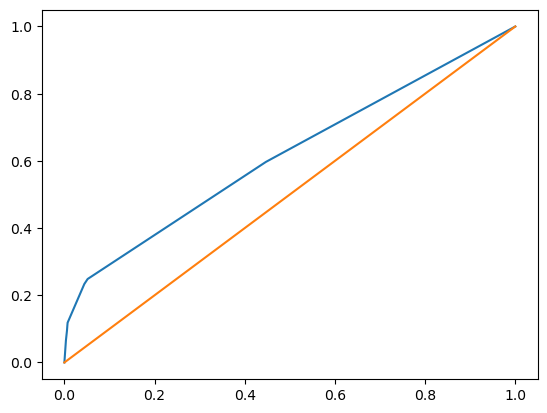

In [52]:
from sklearn.metrics import roc_curve

pro = best_df_model.predict_proba(X_test)

fpr, tpr, _ = roc_curve(y_test, pro[:, 1])

import matplotlib.pyplot as plt

plt.plot(fpr, tpr)

plt.plot([0, 1])

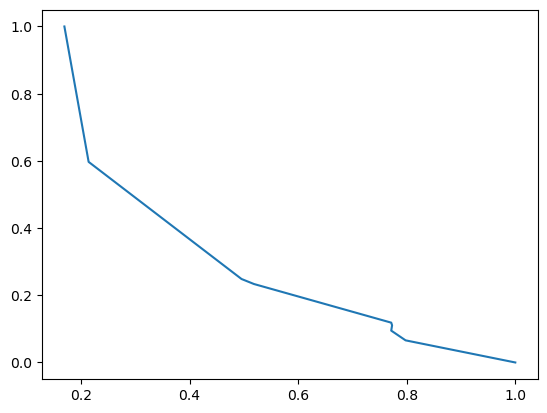

In [54]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, pro[:, 1])

plt.plot(precision, recall)


In [55]:
from joblib import dump

dump(best_df_model, 'df_model.joblib_3')

['df_model.joblib_3']